### Detection Of Autistic Spectrum Disorder: Classification

### About ASD

Autism spectrum disorder (ASD) is a chronic condition that will impact a person's behavior and how he socilaize with others. ASD appears in the early childhood but unfortunately most children diagnosed with ASD until school. Early diagnosis of ASD is significant for a family and also for the children. In this study area, we would like to know how individual characteristics have influence on ASD detection and whether the given individual characteristics are able to effectively predict the ASD cases.

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

### EDA

In [74]:
df = pd.read_csv('Autism_Data.csv', na_values='?',)

In [75]:
data = df.copy()

In [76]:
data.shape

(705, 21)

In [77]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,ASD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,f,White-European,no,no,United States',no,6.0,18 and more',Self,NO
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,m,Latino,no,yes,Brazil,no,5.0,'18 and more',Self,NO
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,m,Latino,yes,yes,Spain,no,8.0,'18 and more',Parent,YES
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,f,White-European,no,yes,'United States',no,6.0,'18 and more',Self,NO


Dataset contains ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

In [78]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    float64
 1   A2_Score         704 non-null    float64
 2   A3_Score         704 non-null    float64
 3   A4_Score         704 non-null    float64
 4   A5_Score         704 non-null    float64
 5   A6_Score         704 non-null    float64
 6   A7_Score         704 non-null    float64
 7   A8_Score         704 non-null    float64
 8   A9_Score         704 non-null    float64
 9   A10_Score        704 non-null    float64
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jaundice         704 non-null    object 
 14  autism           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [80]:
data.dtypes.value_counts()

float64    12
object      9
dtype: int64

Dataset has **704** examples and **21** features. 11 of them are ints, 9 are objects and 1 is float.

### MISSING VALUES

In [81]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

missing_data.head()

,Total,Percent
relation,96,13.617021
ethnicity,96,13.617021
age,3,0.425532
gender,1,0.141844
age_desc,1,0.141844


### "RESULT" COLUMN 

In [82]:
data.iloc[:, 0:10].sum(axis=1).head(10)

0    0.0
1    6.0
2    5.0
3    8.0
4    6.0
5    2.0
6    9.0
7    2.0
8    5.0
9    6.0
dtype: float64

**result** column is a sum of all a*_score columns.

### YES-NO into 0-1

In [83]:
data.columns = map(lambda x: x.strip().lower(), data.columns)

In [84]:
data.rename(columns={'asd': 'decision_class'}, inplace=True)

In [85]:
data.jaundice = data.jaundice.apply(lambda x: 0 if x == 'no' else 1)

In [86]:
data.autism = data.autism.apply(lambda x: 0 if x == 'no' else 1)

In [87]:
data.used_app_before = data.used_app_before.apply(lambda x: 0 if x == 'no' else 1)

In [88]:
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)

### GENDER M-F to 0-1

In [89]:
le = LabelEncoder()

data.gender = le.fit_transform(data.gender) 

#### STRING VALUES CLEANING

In [90]:
data.country_of_res = data.country_of_res.astype('str')
data.country_of_res = data.country_of_res.str.lower()
data.country_of_res = data.country_of_res.str.replace("'", "")
data.country_of_res = data.country_of_res.str.strip()

In [91]:
data.relation = data.relation.replace(np.nan, 'unknown', regex=True)
data.relation = data.relation.astype('str')
data.relation = data.relation.str.lower()
data.relation = data.relation.str.replace("'", "")
data.relation = data.relation.str.strip()

In [92]:
data.ethnicity = data.ethnicity.replace(np.nan, 'unknown', regex=True)
data.ethnicity = data.ethnicity.astype('str')
data.ethnicity = data.ethnicity.str.lower()
data.ethnicity = data.ethnicity.str.replace("'", "")
data.ethnicity = data.ethnicity.str.strip()

#### GENDER VS DECISION CLASS

In [93]:
data.gender[data.decision_class == 0].value_counts() # 0-female, 1-male

1    281
0    234
Name: gender, dtype: int64

In [94]:
data.gender[data.decision_class == 1].value_counts() # 0-female, 1-male

0    103
1     86
2      1
Name: gender, dtype: int64

ASD is diagnosed more commonly in **females** than males.

#### ETHNICITY VS DECISION CLASS

In [95]:
data.ethnicity[data.decision_class == 0].value_counts()

white-european    124
asian             107
unknown            86
middle eastern     84
south asian        33
black              25
others             22
pasifika           11
latino             10
hispanic            8
turkish             5
Name: ethnicity, dtype: int64

<AxesSubplot:>

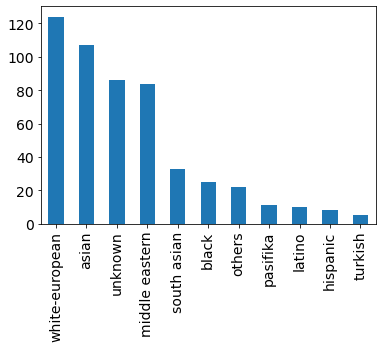

In [96]:
data.ethnicity[data.decision_class == 0].value_counts().plot(kind='bar')

In [97]:
data.ethnicity[data.decision_class == 1].value_counts()

white-european    109
black              18
asian              16
latino             10
unknown            10
others              9
middle eastern      8
hispanic            5
south asian         3
pasifika            1
turkish             1
Name: ethnicity, dtype: int64

<AxesSubplot:>

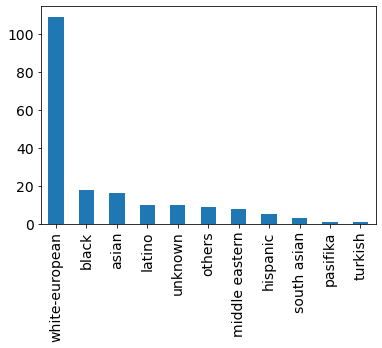

In [98]:
data.ethnicity[data.decision_class == 1].value_counts().plot(kind='bar')

ASD prevalence is reported to be highest among **white-european** people.

#### RELATION VS DECISION CLASS

In [99]:
data.relation[data.decision_class == 0].value_counts()

self                        365
unknown                      86
parent                       38
relative                     19
others                        4
health care professional      3
Name: relation, dtype: int64

<AxesSubplot:>

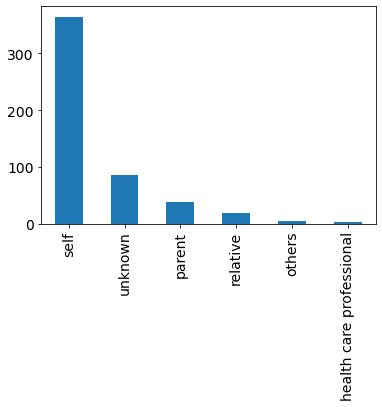

In [100]:
data.relation[data.decision_class == 0].value_counts().plot(kind='bar')

In [101]:
data.relation[data.decision_class == 1].value_counts()

self                        157
parent                       12
unknown                      10
relative                      9
health care professional      1
others                        1
Name: relation, dtype: int64

<AxesSubplot:>

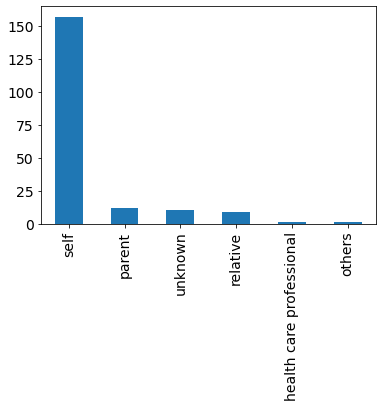

In [102]:
data.relation[data.decision_class == 1].value_counts().plot(kind='bar')

In [103]:
data.country_of_res[data.decision_class == 0].value_counts().head(10)

united arab emirates    79
india                   75
new zealand             66
united states           60
united kingdom          48
jordan                  45
australia               15
sri lanka               14
afghanistan             11
iran                     7
Name: country_of_res, dtype: int64

<AxesSubplot:>

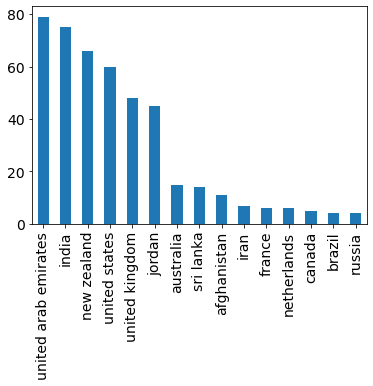

In [104]:
data.country_of_res[data.decision_class == 0].value_counts().head(15).plot(kind='bar')

In [105]:
data.country_of_res[data.decision_class == 1].value_counts().head(10)

united states     53
united kingdom    29
new zealand       15
australia         12
canada            10
india              6
brazil             5
france             5
malaysia           4
netherlands        4
Name: country_of_res, dtype: int64

<AxesSubplot:>

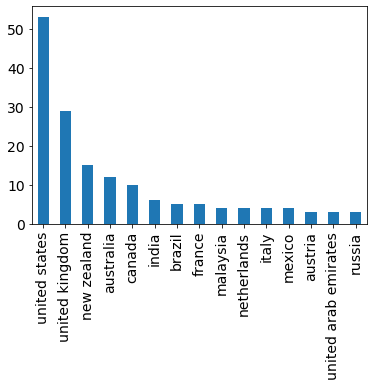

In [106]:
data.country_of_res[data.decision_class == 1].value_counts().head(15).plot(kind='bar')

ASD prevalence is reported to be the highest among **USA** and **UK** citizens.

### LABEL BINARIZING

#### contry_of_res

In [107]:
lb = LabelBinarizer()

lb.fit(data.country_of_res.values)

binarized_data = lb.transform(data.country_of_res.values)

binarized_country_of_res_matrix_data = np.vstack(binarized_data)

In [108]:
binarized_country_of_res_matrix_data.shape

(705, 68)

#### relation

In [109]:
lb = LabelBinarizer()

lb.fit(data.relation.values)

binarized_data = lb.transform(data.relation.values)

binarized_result_matrix_data = np.vstack(binarized_data)

In [110]:
binarized_result_matrix_data.shape

(705, 6)

#### ethnicity

In [111]:
lb = LabelBinarizer()

lb.fit(data.ethnicity.values)

binarized_data = lb.transform(data.ethnicity.values)

binarized_ethnicity_matrix_data = np.vstack(binarized_data)

In [112]:
binarized_ethnicity_matrix_data.shape

(705, 11)

In [113]:
data.drop(['age_desc', 'result'], axis=1, inplace=True)

Dropping **age_desc** and **result** columns, because there's no such relation between other attributes.

**age_desc** column represents the information whether the patient is an adult or not. Every row has the same value - "18 and more", so in our situation its redundant.

Also, **result** column is a sum of all a*_score columns.

In [114]:
data.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,decision_class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,unknown,1,1,nan,1,unknown,1
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0,white-european,0,0,united states,0,self,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,1,latino,0,1,brazil,0,self,0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,27.0,1,latino,1,1,spain,0,parent,1
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0,white-european,0,1,united states,0,self,0


### PATIENTS 

In [115]:
data.age.max(), data.age.min()

(383.0, 17.0)

In [116]:
print('The oldest patient: {} years.'.format(data.age.max()))
print('The youngest patient: {} years.'.format(data.age.min()))
print('Average age: {} years.'.format(data.age.mean()))
print('Median age: {} years.'.format(data.age.median(skipna=True)))

The oldest patient: 383.0 years.
The youngest patient: 17.0 years.
Average age: 29.698005698005698 years.
Median age: 27.0 years.


In [117]:
data.loc[(data.age == 383)]

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,decision_class
53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383.0,0,pasifika,0,0,new zealand,0,self,0


We can either assume it's been put by a mistake and calculate mean/median value or delete that observation.

Here I will calculate a median value.

In [118]:
data.age.median()

27.0

In [119]:
data.age.replace(data.age.max(), data.age.median(), inplace=True)

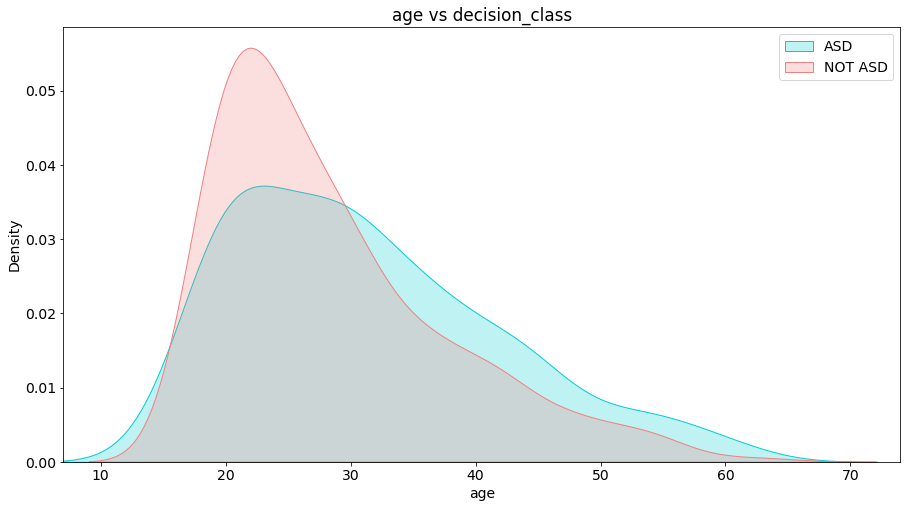

In [120]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.age[data.decision_class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data.age[data.decision_class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('age vs decision_class')
plt.xlim(data.age.min() - 10, data.age.max() + 10)
plt.show()

In [121]:
data.decision_class.value_counts()

0    515
1    190
Name: decision_class, dtype: int64

In [122]:
data.gender[data.decision_class == 1].value_counts()

0    103
1     86
2      1
Name: gender, dtype: int64

In [123]:
data.gender[data.decision_class == 0].value_counts()

1    281
0    234
Name: gender, dtype: int64

In [124]:
data.isnull().sum()

a1_score           1
a2_score           1
a3_score           1
a4_score           1
a5_score           1
a6_score           1
a7_score           1
a8_score           1
a9_score           1
a10_score          1
age                3
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
relation           0
decision_class     0
dtype: int64

In [125]:
data['age'].fillna(data['age'].mean(),inplace=True)
data['a1_score'].fillna(data['a1_score'].mean(),inplace=True)
data['a2_score'].fillna(data['a2_score'].mean(),inplace=True)
data['a3_score'].fillna(data['a3_score'].mean(),inplace=True)
data['a4_score'].fillna(data['a4_score'].mean(),inplace=True)
data['a5_score'].fillna(data['a5_score'].mean(),inplace=True)
data['a6_score'].fillna(data['a6_score'].mean(),inplace=True)
data['a7_score'].fillna(data['a7_score'].mean(),inplace=True)
data['a8_score'].fillna(data['a8_score'].mean(),inplace=True)
data['a9_score'].fillna(data['a9_score'].mean(),inplace=True)
data['a10_score'].fillna(data['a10_score'].mean(),inplace=True)

### MISSING VALUES IMPUTATION

In [126]:
to_update_nans_dict = {}

columns = ['age']

for _decision_class in [0, 1]:
    for column in columns:
        vals = data[data.decision_class == _decision_class][column].value_counts()
        
        to_update_nans_dict['{decision_class}_{column}'.format(
            decision_class=_decision_class,
            column=column
        )] = vals.idxmax()

In [127]:
to_update_nans_dict

{'0_age': 21.0, '1_age': 30.0}

In [128]:
data.iloc[62, data.columns.get_loc('age')] = to_update_nans_dict.get('0_age')

In [129]:
data.iloc[91, data.columns.get_loc('age')] = to_update_nans_dict.get('1_age')

### HEATMAP

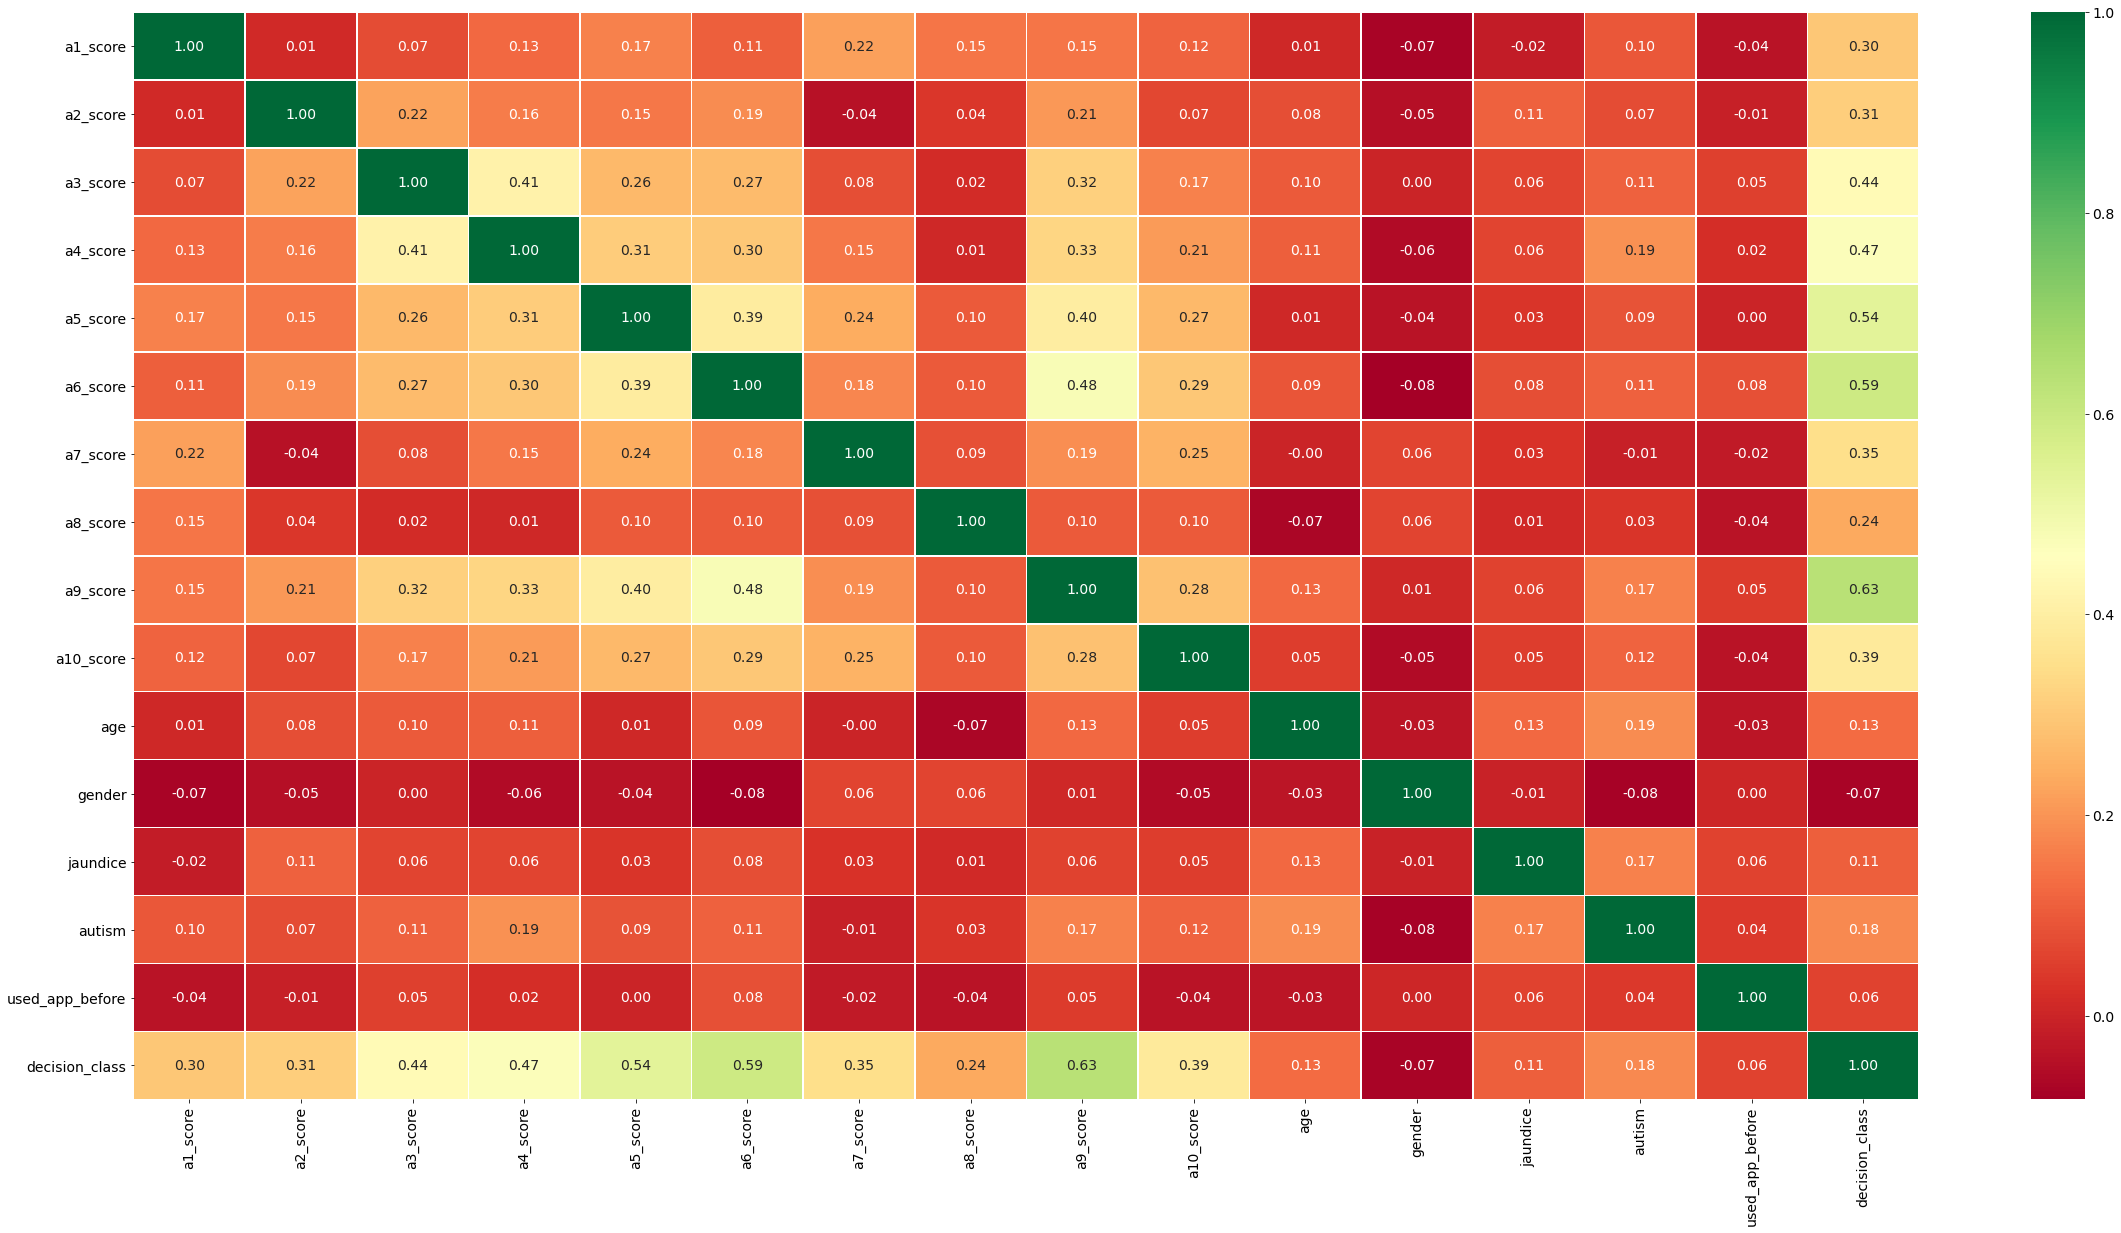

In [130]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

### PREPARING DATA FOR MODEL

In [131]:
feature_names = list(set(data.columns[0:-1].tolist()).difference(['country_of_res', 'relation', 'ethnicity']))
 
X = data[feature_names].values

X_new = np.hstack((
    X, 
    binarized_country_of_res_matrix_data,
    binarized_ethnicity_matrix_data,
    binarized_result_matrix_data,
))
                   
y = data.decision_class

In [132]:
X_new.shape, y.shape

((705, 100), (705,))

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    random_state=42,
    test_size=0.2
)

In [134]:
log_reg = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    random_state=42,
    multi_class='ovr'
)

In [135]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', random_state=42,
                   solver='liblinear')

In [136]:
log_reg_predict = log_reg.predict(X_test)

In [137]:
log_reg.score(X_test, y_test)

1.0

In [138]:
preds = log_reg.predict(X_test)

In [139]:
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]

In [140]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, log_reg_predict))


Logistic Regression Accuracy: 100.00%
Logistic Regression AUC: 100.00%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        46

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [141]:
print(confusion_matrix(y_test, preds))

[[95  0]
 [ 0 46]]


### ROC

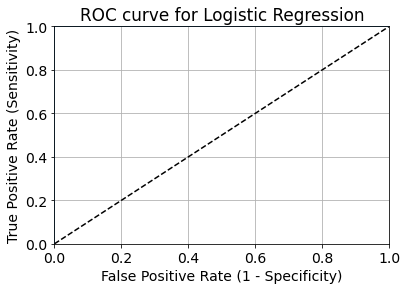

In [142]:
fpr, tpr, thresholds = roc_curve(
    y_test, 
    log_reg_predict_proba
)

plt.plot(
    [0, 1], 
    [0, 1], 
    'k--'
)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

### F1 SCORE AFTER 10-FOLD CROSS-VALIDATION

In [143]:
kfold = StratifiedKFold(
    n_splits=10, 
    shuffle=True, 
    random_state=42
)

predicted = cross_val_predict(
    log_reg, 
    X_new, 
    y, 
    cv=kfold
)

scores = cross_val_score(
    log_reg, 
    X_new, 
    y, 
    cv=kfold,
    scoring='f1'
)

print('Cross-validated scores: {}\n'.format(scores))

print(classification_report(y, predicted))

print("\nLogisticRegression: F1 after 10-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    scores.mean() * 100,
    scores.std() * 2
))

Cross-validated scores: [1.         1.         1.         1.         1.         1.
 1.         0.97297297 1.         0.97297297]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      0.99      0.99       190

    accuracy                           1.00       705
   macro avg       1.00      0.99      1.00       705
weighted avg       1.00      1.00      1.00       705


LogisticRegression: F1 after 10-fold cross-validation: 99.46% (+/- 0.02%)


In [144]:
import pickle
pickle.dump(log_reg,open("model.pkl","wb"))